In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../Resources.2/final_temperature_change.csv"
temp_anom_df = pd.read_csv(file_path)
temp_anom_df.head()

,country_code_alpha_three,year,temp_change_celsius
0,AFG,1970,0.898
1,AFG,1971,0.652
2,AFG,1972,-1.089
3,AFG,1973,0.262
4,AFG,1974,-0.470


In [3]:
ind_temp_anom_df= temp_anom_df[(temp_anom_df['country_code_alpha_three'] == 'IND')]
ind_temp_anom_df.head()

,country_code_alpha_three,year,temp_change_celsius
4872,IND,1970,0.059
4873,IND,1971,-0.470
4874,IND,1972,0.040
4875,IND,1973,0.296
4876,IND,1974,0.012


In [4]:
ind_temp_anom_df= ind_temp_anom_df.drop(['country_code_alpha_three'], axis=1)
ind_temp_anom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 4872 to 4922
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 51 non-null     int64  
 1   temp_change_celsius  51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [5]:
ind_temp_anom_df = ind_temp_anom_df.dropna( )

In [6]:
ind_temp_anom_df.head()

,year,temp_change_celsius
4872,1970,0.059
4873,1971,-0.470
4874,1972,0.040
4875,1973,0.296
4876,1974,0.012


In [7]:
ind_temp_anom_df.set_index('year',inplace = True)
ind_temp_anom_df.head()

,temp_change_celsius
year,
1970,0.059
1971,-0.470
1972,0.040
1973,0.296
1974,0.012


AxesSubplot(0.125,0.125;0.775x0.755)


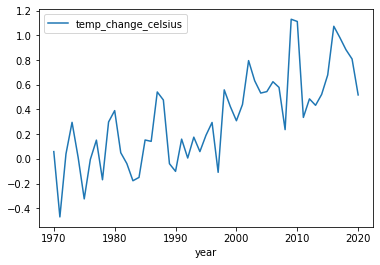

In [8]:
axis = ind_temp_anom_df.plot.line(y='temp_change_celsius',rot=0)
print(axis)
plt.show()

In [9]:
ind_temp_anom_df= ind_temp_anom_df.sort_values('temp_change_celsius',ascending=False)
ind_temp_anom_df.head(10)

,temp_change_celsius
year,
2009,1.131
2010,1.113
2016,1.074
2017,0.982
2018,0.884
2019,0.809
2002,0.796
2015,0.680
2003,0.633


In [10]:
ind_temp_anom_df.describe()

,temp_change_celsius
count,51.000000
mean,0.324882
std,0.372869
min,-0.470000
25%,0.045000
50%,0.299000
75%,0.543500
max,1.131000


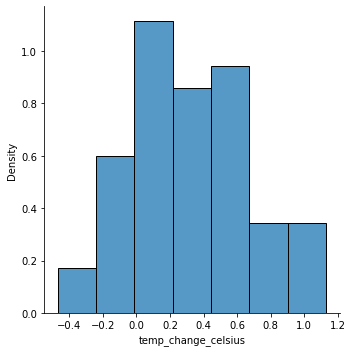

In [11]:
import seaborn as sb

# Extract feature we're interested in
data = ind_temp_anom_df['temp_change_celsius']

# Generate histogram/distribution plot
sb.displot(data, stat="density")

plt.show()

In [12]:
data.head()

year
2009    1.131
2010    1.113
2016    1.074
2017    0.982
2018    0.884
Name: temp_change_celsius, dtype: float64

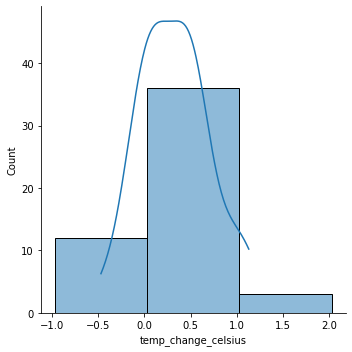

In [13]:
sb.displot(data, discrete = True, kde = True)
plt.show()

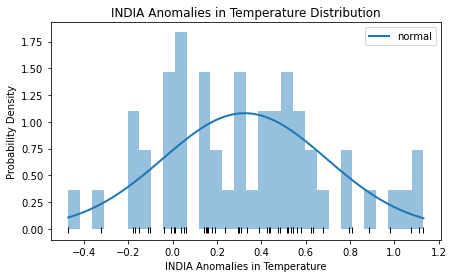

In [14]:
# Histogram
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data, np.full_like(data, -0.01), '|k', markeredgewidth=1)
ax.set_title('INDIA Anomalies in Temperature Distribution')
ax.set_xlabel('INDIA Anomalies in Temperature')
ax.set_ylabel('Probability Density')
ax.legend();

C:\Users\splt1\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


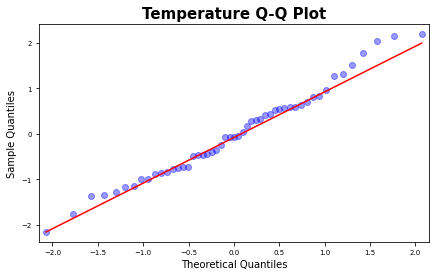

In [15]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Temperature Q-Q Plot', fontsize = 15,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [16]:
print('Kursotis:', stats.kurtosis(data))
print('Skewness:', stats.skew(data))

Kursotis: -0.3884816870929453
Skewness: 0.2748812782784615


In [17]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(data)
shapiro_test

ShapiroResult(statistic=0.980647087097168, pvalue=0.5665804147720337)

In [18]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 0.8903255780983907, p-value = 0.6407199653482709
